# Определение наиболее выгодного региона для нефтедобычи
Нефтедобывающая компания предоставила пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Нужно построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Возможную прибыль и риски необходимо проанализировать техникой Bootstrap.

#### Шаги для выбора локации:

- в избранном регионе ищут месторождения, для каждого определяют значения признаков
- строят модель и оценивают объём запасов
- выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины
прибыль равна суммарной прибыли отобранных месторождений.

#### Условия задачи:

- для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- при разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли.
- бюджет на разработку скважин в регионе — 10 млрд рублей.
- один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- после оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

####Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Импорт библиотек:

In [ ]:
## Для работыс данными:
# Импортируем pandas как pd:
import pandas as pd
# Импортируем numpy как np:
import numpy as np
# Для создания выборок:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Для загрузки файлов(у меня):
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Импортируем math:
import math

## Для граффиков:
# Импорт библиотеки matplotlib.pyplot как plt:
import matplotlib.pyplot as plt
# Импорт библиотек для граффиков:
# Импорт библиотеки matplotlib.pyplot как plt:
import matplotlib.pyplot as plt
# Импорт библиотеки seaborn как sns:
import seaborn as sns

# Импорт модели:
from sklearn.linear_model import LinearRegression

# Импорт метрики:
from sklearn.metrics import mean_squared_error

# Изучение общей информации о данных:

In [ ]:
# загружаем таблицу данных в переменную data_0:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_0 = pd.read_csv('df = pd.read_csv("/content/drive/MyDrive/For_data/geo_data_0.csv")')
# Выводим размер таблицы:
print("Размер первой таблицы:", data_0.shape)
# Выводим информацию о таблице данных:
data_0.info()
# Выводим таблицу:
display(data_0.head())

# загружаем таблицу данных в переменную data_1:
try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv('df = pd.read_csv("/content/drive/MyDrive/For_data/geo_data_0.csv")')
# Выводим размер таблицы:
print("Размер второй таблицы:", data_1.shape)
# Выводим информацию о таблице данных:
data_1.info()
# Выводим таблицу:
display(data_1.head())

# загружаем таблицу данных в переменную data_2:
try:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv('df = pd.read_csv("/content/drive/MyDrive/For_data/geo_data_0.csv")')
# Выводим размер таблицы:
print("Размер третей таблицы:", data_2.shape)
# Выводим информацию о таблице данных:
data_2.info()
# Выводим таблицу:
display(data_2.head())

Размер первой таблицы: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Размер второй таблицы: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Размер третей таблицы: (100000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


### Вывод:
Даны три таблицы. У всех одинаковый размер: 10000 строк, 5 колонок. Во всех 3х таблицах одинаковые колонки с одним значением:

id — уникальный идентификатор скважины.

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы).

product — объём запасов в скважине (тыс. баррелей).

Пропусков нигде нет.

## Подготовка данных:

In [ ]:
# Создание функции для разделения данных, а также последующего сохранения в списках:
def separation_scaling(data):
    # Разделяю данные на признаки и цель:
    features = data[['f0', 'f1', 'f2']]
    target = data['product']

    # Разделяю выборки на обучающую и валидационную:
    features_train, features_valid, target_train, target_valid = train_test_split(features, target,
                                                                                  test_size=0.25, random_state=12345)
    # Масштабирую признаки:
    pd.options.mode.chained_assignment = None
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    return features_train, features_valid, target_train, target_valid

Всё будет хранится в списках, таким образом к регионам можно обращаться по индексам(удобно).

In [ ]:
# Создаём списки для выборок:
features_train = []
features_valid = []
target_train = []
target_valid = []
# Список для проверки размера выборок:
list_range = []

# Заполнение списков по регионам:
for data_i in [data_0, data_1, data_2]:
    # За
    features_train_i, features_valid_i, target_train_i, target_valid_i = separation_scaling(data_i)
    # Заполняю списки:
    features_train.append(features_train_i)
    features_valid.append(features_valid_i)
    target_train.append(target_train_i)
    target_valid.append(target_valid_i)
    # Сохраняю размер выборок:
    list_range.append([len(features_train_i), len(features_valid_i), len(target_train_i), len(target_valid_i)])
# Проверка размеров выборок:
pd.DataFrame(list_range, columns=['features_train', 'features_valid', 'target_train', 'target_valid'],
            index=['Регион_0', 'Регион_1', 'Регион_2'])

,features_train,features_valid,target_train,target_valid
Регион_0,75000,25000,75000,25000
Регион_1,75000,25000,75000,25000
Регион_2,75000,25000,75000,25000


#### Вывод:
Выборки успешно подготовлены для работы с ними.

# Работа с Моделью:
Вся работа с моделями и из результатами также будет сохроняться в списках для удобства.

In [ ]:
# Создаем списки для работы:
# Предсказания:
predictions = []
# Результат(RMSE):
result = []
# Модель:
models =[]

# Проходимся циклом по регионом собираем предсказания и результаты:
for i in [0,1,2]:
    # Инициализация модели:
    model = LinearRegression()
    # Обучение модели:
    model.fit(features_train[i], target_train[i])
    # Предсказания:
    predict = model.predict(features_valid[i])
    # Сохранение в списках:
    predictions.append(predict)
    models.append(model)
    result.append([predict.mean().round(2), mean_squared_error(target_valid[i], predict, squared=False).round(2)])
    print('Средний запас нефти в Регионе',i,' Равен:', predict.mean().round(2))
    print("RMSE Региона", i, 'Равно:', mean_squared_error(target_valid[i], predict, squared=False).round(2))
    print('')

Средний запас нефти в Регионе 0  Равен: 92.59
RMSE Региона 0 Равно: 37.58

Средний запас нефти в Регионе 1  Равен: 68.73
RMSE Региона 1 Равно: 0.89

Средний запас нефти в Регионе 2  Равен: 94.97
RMSE Региона 2 Равно: 40.03



### Вывод:
Регион 1 сильно отличается от остальных, в нём средний запас нефти меньше чем в других, примерно на 25 меньше. Но также RMSE самое малленькое всего 0.89

Два остальных региона похожи: В Регионе 0 Средний запас нефти на чуть больше 2, меньше чем в Регионе 2.  
    
RMSE у них таже отличается незначительно, разница примерно 2.5 .

## Подготовка к расчёту прибыли:

In [ ]:
# Создадим константные переменные:
# Бюджет на разработку скважин в регионе:
BUDGET = 10000000000
# Доход с 1000 баррель нефти:
INCOME_FROM_1000_BARR = 450000
# Шахты для разведки:
MINE_FOR_DEVELOPMENT = 500
# Шахты для разроботки:
MINE_FOR_EXPLORATION = 200
# Вероятность убытков:
P_RISK_LOSS = 0.025

In [ ]:
# Расчёт обьёма(volume) сырья для безубыточной работы:
volume = BUDGET / INCOME_FROM_1000_BARR / MINE_FOR_EXPLORATION
print('Достаточный обьём сырья для безубыточной работы скважины равен:', volume, 'тыс. барр.')

Достаточный обьём сырья для безубыточной работы скважины равен: 111.11111111111111 тыс. барр.


### Вывод:
Для открытия новой скважины её обьём должен состовлять более 111.1 тыс. барр.

Следовательно в скважине обьём должен быть выше среднего по региону( в Регионе 1 почти в 2 рааз) Для регионов 0 и 2 это более реально чем для региона 1.

# Расчёт прибыли и рисков:

In [ ]:
# Создание функции для расчёта дохода:
def calculation_of_income(target, predict, count):
    # Список в Series:
    predict =pd.Series(predict, index=predict.index)
    # Сортируем, чтобы в начале были шахты с макс обьёмом нефти:
    sort_predict = predict.sort_values(ascending=False)
    # Берём заданное кол-во шахт, собираем о них фактические данные о запасах нефти:
    selected = target[sort_predict.index][:count]
    return (selected.sum() * INCOME_FROM_1000_BARR) - BUDGET

In [ ]:
# Создание рандомайзера:
random = np.random.RandomState(12345)
# Создание списка с результатами:
income = []
# Создание списка со всеми прибылями по регионам:
incomes_from_all = []

# Цикл для расчётов по регионам:
for i in [0,1,2]:
    # Список средней прибыли:
    mean_profit = []
    for bootstrap in range(1000):
        # Преобразуем список в Series для удобства:
        predict = pd.Series(predictions[i], index=target_valid[i].index)
        # Подвыборка из 500 шахт:
        pred_sample = predict.sample(n=MINE_FOR_DEVELOPMENT, replace=True, random_state=random)
        # Цель для выбранных шахт:
        target_sample = target_valid[i][pred_sample.index]
        # Добовляем в список результаты для 200 самых лучших шахт:
        mean_profit.append(calculation_of_income(target_sample, pred_sample, MINE_FOR_EXPLORATION))
    # Преобразуем список в Series:
    mean_profit = pd.Series(mean_profit)#, index=result.index)
    # Добовляем в список со всеми прибылями:
    incomes_from_all.append(mean_profit)
    # Создаем квантили:
    upper = mean_profit.quantile(0.975)
    lower = mean_profit.quantile(0.025)
    # Средняя выручка:
    income_mean = mean_profit.mean()
    income_mean = round(income_mean,1)
    # Убытки:
    loss = mean_profit < 0
    # Процент убыточных выборок:
    loss_risk_percent = loss.sum()/len(loss)*100
    # Добовляем результаты в список:
    income.append([income_mean, lower, upper, loss_risk_percent])

In [ ]:
# Преобразуем список в таблицу:
income = pd.DataFrame(income, columns=['Средняя Прибыль', 'Квантиль 2.5', 'Квантиль 97.5', 'Риск убытка'])
display(income)

,Средняя Прибыль,Квантиль 2.5,Квантиль 97.5,Риск убытка
0,425938526.9,-1.020901e+08,9.479764e+08,6.0
1,518259493.7,1.281232e+08,9.536130e+08,0.3
2,420194005.3,-1.158526e+08,9.896299e+08,6.2


/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


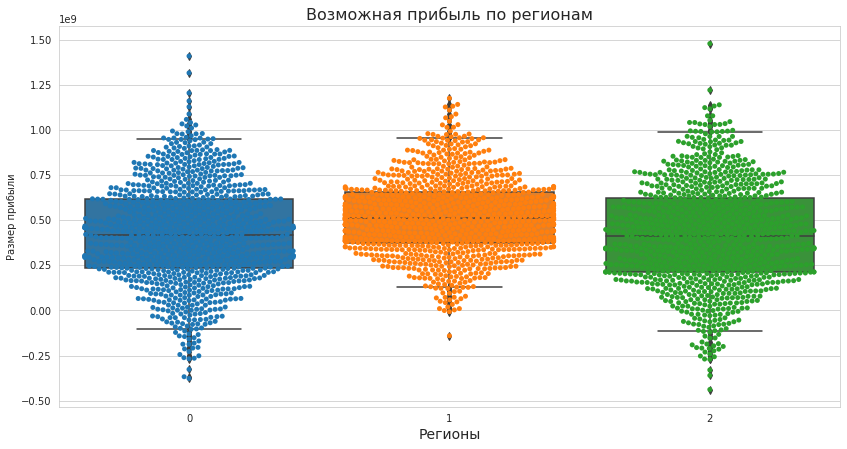

In [ ]:
# Создание граффика для наглядности:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 7))
boxplot = sns.boxplot(data=incomes_from_all, whis=[2.5, 97.5])
# Детализация граффика:
boxplot.axes.set_title('Возможная прибыль по регионам', fontsize=16)
sns.swarmplot(data=incomes_from_all)
boxplot.set_ylabel('Размер прибыли', fontsize=10)
boxplot.set_xlabel('Регионы', fontsize=14)
#boxplot.xtickslabels(['Регион 0', 'Регион 1' , 'Регион 2'])
plt.show()

## Вывод:
Регион 0 НЕ является самым убыточным. Шанс убытков всего 6% Однако это не входит в нужный порог, это второй регион по 'окупаемости'.

Сравнивая с Регионом 2 , медиана региона 0 всё же выше, следовательно больше окупаемость.
    
Регион 1 - Он является наимение убыточным регионом шанс убытка всего 0.3%, Также это видно по граффику, практически все значения находятся в пределах прибыли.  

Регион 2 - Он вляется регионом с небольшим кол-вом убыточности 6.3% ,Однако это не входит в нужный порог. Но это самый убыточный регион из всех. Разбросы в этом регионе больше чем в любом другом, а также медиана наимение сконцентрирована посравнению с другими регоинами.
    
По итогу Регион 1 самый лучший на мой выбор.

# Вывод:
## По моему мнению лучшим регионом для разработки будет 'Регион 1'.
#### Потому, что он является наимение убыточным из 3х регионов, риск убытка всего 0.3%. А также довольно прибыльным.

## В данном проекте были предприняты следующие шаги:

### 1.) Получена и проанализирована общая информация о данных.

### 2.) Подготовлены данные для работы.

### 3.) Проведена работа с моделью.

### 4.) Произведён расчёт прибыли и рисков.

### 5.) Выбран лучший регион для разработки